# Graph img
;
O 5
Los
I
"15
MISTI
1+511019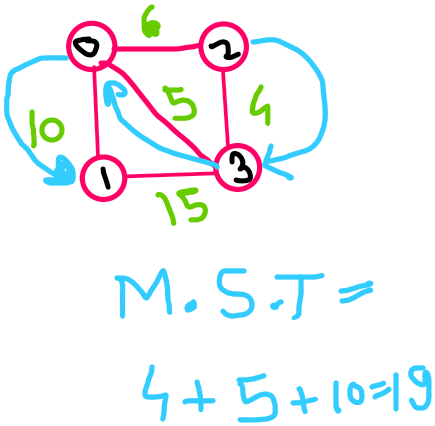

In [1]:
# Python program for Kruskal's algorithm to find
# Minimum Spanning Tree of a given connected,
# undirected and weighted graph


# Class to represent a graph
class Graph:

	def __init__(self, vertices):
		self.V = vertices
		self.graph = []

	# Function to add an edge to graph
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])

	# A utility function to find set of an element i
	# (truly uses path compression technique)
	def find(self, parent, i):
		if parent[i] != i:

			# Reassignment of node's parent
			# to root node as
			# path compression requires
			parent[i] = self.find(parent, parent[i])
		return parent[i]

	# A function that does union of two sets of x and y
	# (uses union by rank)
	def union(self, parent, rank, x, y):

		# Attach smaller rank tree under root of
		# high rank tree (Union by Rank)
		if rank[x] < rank[y]:
			parent[x] = y
		elif rank[x] > rank[y]:
			parent[y] = x

		# If ranks are same, then make one as root
		# and increment its rank by one
		else:
			parent[y] = x
			rank[x] += 1

	# The main function to construct MST
	# using Kruskal's algorithm
	def KruskalMST(self):

		# This will store the resultant MST
		result = []

		# An index variable, used for sorted edges
		i = 0

		# An index variable, used for result[]
		e = 0

		# Sort all the edges in
		# non-decreasing order of their
		# weight
		self.graph = sorted(self.graph,
							key=lambda item: item[2])

		parent = []
		rank = []

		# Create V subsets with single elements
		for node in range(self.V):
			parent.append(node)
			rank.append(0)

		# Number of edges to be taken is less than to V-1
		while e < self.V - 1:

			# Pick the smallest edge and increment
			# the index for next iteration
			u, v, w = self.graph[i]
			i = i + 1
			x = self.find(parent, u)
			y = self.find(parent, v)

			# If including this edge doesn't
			# cause cycle, then include it in result
			# and increment the index of result
			# for next edge
			if x != y:
				e = e + 1
				result.append([u, v, w])
				self.union(parent, rank, x, y)
			# Else discard the edge

		minimumCost = 0
		print("Edges in the constructed MST")
		for u, v, weight in result:
			minimumCost += weight
			print("%d -- %d == %d" % (u, v, weight))
		print("Minimum Spanning Tree", minimumCost)


# Driver code
if __name__ == '__main__':
	g = Graph(4)
	g.addEdge(0, 1, 10)
	g.addEdge(0, 2, 6)
	g.addEdge(0, 3, 5)
	g.addEdge(1, 3, 15)
	g.addEdge(2, 3, 4)

	# Function call
	g.KruskalMST()

# This code is contributed by Neelam Yadav
# Improved by James Graça-Jones


Edges in the constructed MST
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10
Minimum Spanning Tree 19
